In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("../ayush/Downloads/creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.shape

(284807, 31)

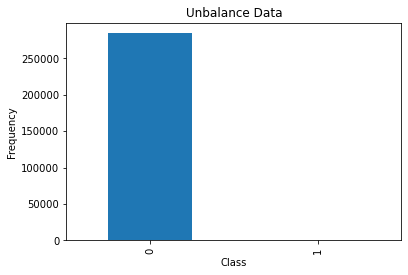

In [7]:
#unbalance data
count = pd.value_counts(data['Class'], sort = True).sort_index()
count.plot(kind = 'bar')
plt.title('Unbalance Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [58]:
print("The missing values in different columns are: ")
print(data.isnull().sum())

The missing values in different columns are: 
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
normAmount    0
dtype: int64


In [59]:
No_of_frauds= len(data[data["Class"]==1])
No_of_normals = len(data[data["Class"]==0])
total=No_of_frauds+No_of_normals

In [60]:
frauds=(data[data["Class"]==1])
normal=(data[data["Class"]==0])

In [61]:
Fraud_percent= (No_of_frauds / total)*100
Normal_percent= (No_of_normals / total)*100

In [62]:
print("The number of normal transactions(Class 0) are: ", No_of_normals)

The number of normal transactions(Class 0) are:  284315


In [63]:
print("The number of fraudulent transactions(Class 1) are: ", No_of_frauds)

The number of fraudulent transactions(Class 1) are:  492


In [64]:
print("Class 0 percentage = ", Normal_percent)
print("Class 1 percentage = ", Fraud_percent)

Class 0 percentage =  99.82725143693798
Class 1 percentage =  0.1727485630620034


In [65]:
print(frauds.shape)
print(normal.shape)

(492, 32)
(284315, 32)


In [66]:
# removing duplicate values
data['normAmount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
X=data.drop(['Time','Amount'],axis=1)
y=data['Class']

In [67]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 16)

In [68]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (213605, 30)
X_test.shape:  (71202, 30)
y_train.shape:  (213605,)
y_test.shape:  (71202,)


In [69]:
classifier= svm.SVC(C= 1, kernel= 'linear', random_state= 0)

In [70]:
classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [71]:
y_pred = classifier.predict(X_test)

In [72]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
from sklearn.metrics import recall_score,precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score

In [73]:
con_mat = confusion_matrix(y_test, y_pred)

In [74]:
average_precision = average_precision_score(y_test, y_pred)

In [75]:
cls_report = classification_report(y_test, y_pred)

In [76]:
print("Area under the curve : %f" % (roc_auc_score(y_test, y_pred)))

Area under the curve : 1.000000


In [77]:
print("Average precision-recall score RF: {}".format(average_precision))

Average precision-recall score RF: 1.0


In [78]:
print(con_mat)

[[71074     0]
 [    0   128]]


In [54]:
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71074
           1       1.00      1.00      1.00       128

    accuracy                           1.00     71202
   macro avg       1.00      1.00      1.00     71202
weighted avg       1.00      1.00      1.00     71202



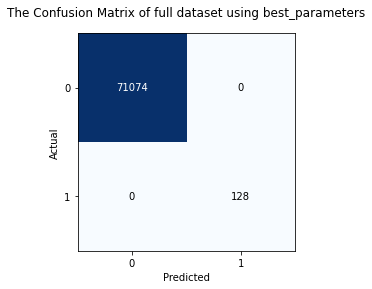

The accuracy is 100.0 %
The recall from the confusion matrix is 100.0 %


In [55]:
def confus_matrix(CM):
    fig, ax = plot_confusion_matrix(conf_mat= CM)
    plt.title("The Confusion Matrix of full dataset using best_parameters")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    print("The accuracy is "+str((CM[1,1]+CM[0,0])/(CM[0,0] + CM[0,1]+CM[1,0] + CM[1,1])*100) + " %")
    print("The recall from the confusion matrix is "+ str(CM[1,1]/(CM[1,0] + CM[1,1])*100) +" %")
confus_matrix(con_mat)

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

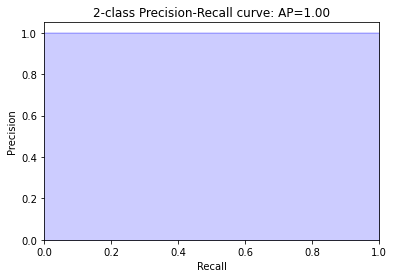

In [56]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

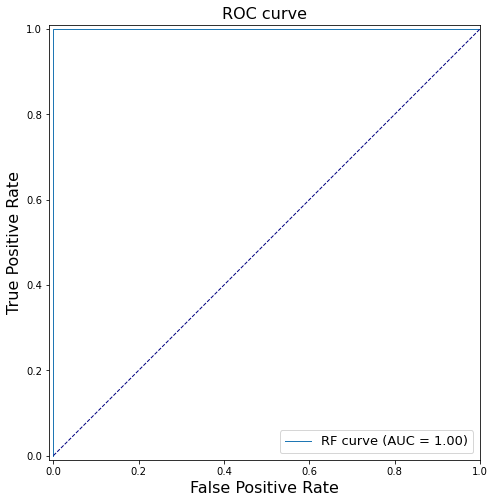

In [57]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()